### PCA (Principal Component Analysis)

1) It is an unsupervised learning algorithm meant for dimensionality reduction<br>
2) It reduces the number of columns<br> 

### PCA Steps

#### 1) Standardization (StandardScaler)
Standardized value (z) = (Actual Value – mean)/ Standard Deviation 

#### 2) Covariance Matrix Computation
a) The aim of this step is to understand how the variables of the input data set are varying 
from the mean with respect to each other, or in other words, to see if there is any 
relationship between them.

<img src="pca1.png" align="left" width="350">
<img src="pca2.png" align="middle" width="400">

<pre>
cov(x,y) for 2 variables x and y 
cov(x,y) = [cov(x,x)  cov(x,y)]
           [cov(y,x)  cov(y,y)]
           </pre>

#### Eigen Values and Eigen Vectors
Link -> https://www.mathsisfun.com/algebra/eigenvalue.html

#### 3) Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

a)	Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.<br>
b)	Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.<br>

Order of Significance for PC1, PC2, PC3, PC4, PC5:<br>
PC1>PC2>PC3>PC4>PC5<br>

c)	Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables

#### How PCA constructs Pricncipal Components
a)	There are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set.<br>
b)	Every eigenvalue has an eigenvector. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvalues with 3 corresponding eigenvectors.<br>
c)	<b>The eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.</b><br>

d)	<b>By ranking your eigenvectors in order of their eigenvalues, highest to lowest(descending order), you get the principal components in order of significance.</b><br>


#### 4) Feature Vector
a) Computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and with the remaining ones form a matrix of vectors that we call Feature vector.<br>
b) So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction.

#### 5) Recast the Data Along the Principal Components Axes

a) In the last step, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.<br>
<b>b) FinalDataSet = StandardizedOriginalDataSet * FeatueVector^T</b>

FinalDataSet = Principal Components

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Wholesale_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df1 = df.iloc[:,2:]
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [9]:
df1.shape

(440, 6)

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
x_sc = sc.fit_transform(df1)
print(x_sc.shape)
print(type(x_sc))

(440, 6)
<class 'numpy.ndarray'>


### PCA

In [13]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()  
x_new = pca.fit_transform(x_sc)
print(x_new.shape)

(440, 6)


In [18]:
# Principal components
x_new

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

#### PCA Validation

In [19]:
eig_val = pca.explained_variance_   # Eigen values
eig_vec = pca.components_           # Eigen vector
print(eig_val)
print(eig_vec)
# By ranking your eigenvectors in order of their eigenvalues, highest to lowest(descending order), 
# you get the principal components in order of significance.

[2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]
[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [21]:
tot = sum(eig_val)
var_eig_val = [(i/tot)*100 for i in eig_val]
print(var_eig_val)
sum_var_eig_val = np.cumsum(var_eig_val)
print(sum_var_eig_val)

[44.082892881128046, 28.376399526616915, 12.334412896786473, 9.395503752971504, 4.761272400688685, 1.049518541808375]
[ 44.08289288  72.45929241  84.7937053   94.18920906  98.95048146
 100.        ]


In [22]:
# Validation
result = np.dot(x_sc,eig_vec.T)
result

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [23]:
x_new

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [25]:
df1_pc = pd.DataFrame(x_new,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df1_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825


In [26]:
df1_pc = df1_pc.iloc[:,:4]
df1_pc.head()

,PC1,PC2,PC3,PC4
0,0.193291,-0.305100,-0.140878,-0.486432
1,0.434420,-0.328413,0.319007,-0.178830
2,0.811143,0.815096,1.523416,-1.254082
3,-0.778648,0.652754,0.163012,0.380060
4,0.166287,1.271434,0.066279,-0.826227


### Clustering Algorithms

In [27]:
from sklearn.cluster import KMeans

Wcss
 [2486.59511911808, 1801.441930107727, 1463.7558914727617, 1175.3757618736408, 909.5382816298603, 775.3135452601108, 674.3934561132853, 593.6507263798859, 524.6907294791386, 462.4669072530946, 414.1892374186879, 390.94333959314116, 354.2410858168443, 332.0389013011005, 307.01586719075544, 289.99449607480165, 272.3253724192393, 252.4154644667842]


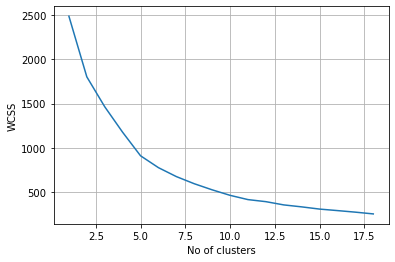

In [28]:
# wcss = within cluster sum of square
wcss =[]
for i in range(1,19):
    m = KMeans(n_clusters=i)
    m.fit(df1_pc)
    wcss.append(m.inertia_)
    
print('Wcss\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [29]:
k5 = KMeans(n_clusters=5)
k5.fit(df1_pc)

KMeans(n_clusters=5)

In [30]:
ypred5 = k5.labels_
print(ypred5)

[1 3 3 1 0 1 1 1 1 3 3 1 0 3 3 1 3 1 1 1 1 1 0 3 3 1 1 1 3 0 1 1 1 0 1 3 0
 3 3 0 0 1 3 3 3 3 3 2 3 3 1 1 0 3 1 1 2 3 1 1 1 2 1 3 1 2 1 3 1 1 0 0 1 0
 1 1 1 3 1 1 1 3 3 1 1 2 2 0 1 0 1 1 2 0 3 1 1 1 1 1 3 3 1 0 1 1 3 3 1 3 1
 3 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 3 1 1
 1 0 1 1 1 1 1 3 3 1 3 3 3 1 1 3 1 3 3 1 1 1 3 3 1 3 1 3 0 1 1 1 1 0 3 4 1
 1 1 1 3 3 1 1 1 3 1 0 0 3 1 1 3 3 0 1 1 3 1 1 1 3 1 2 1 1 3 3 3 1 3 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 3 3 1 1 1 1 1 2 1 0 3 0 1 1 0
 0 1 1 1 1 3 3 3 1 3 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 3 1 1
 1 1 1 1 1 3 3 3 3 3 3 1 1 3 1 0 3 1 1 3 1 1 1 3 1 1 1 1 1 0 1 1 1 1 1 3 1
 2 0 0 1 1 1 1 3 3 1 3 1 1 3 0 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 3 0 1 1 0 0 0 1 3 1 1 1 1 1 1 1 1 0 1 1 3 1 1 1 1 0 1 1 1 1 0
 3 1 1 1 1 1 0 1 1 3 1 3 1 3 1 1 1 1 0 3 0 1 1 1 0 1 1 1 0 0 3 1 1]


In [31]:
cent5 = k5.cluster_centers_
print(cent5)

[[-1.96716620e-01  1.84432417e+00 -9.04037259e-01  1.88601961e-01]
 [-7.50161504e-01 -1.84958104e-01  1.32923708e-01 -4.60195688e-02]
 [ 7.28674184e+00 -1.05985283e+00 -8.47363350e-01  5.49436185e-01]
 [ 1.37650756e+00 -7.19476791e-01  2.18106943e-01 -3.38751516e-03]
 [ 7.79794031e+00  1.39490842e+01  8.51512994e+00 -4.66843242e+00]]


In [32]:
df['Cls5'] = ypred5
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cls5
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
